# Import the libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Import the dataset

In [6]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [7]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Analyzing the data

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

# Visualization

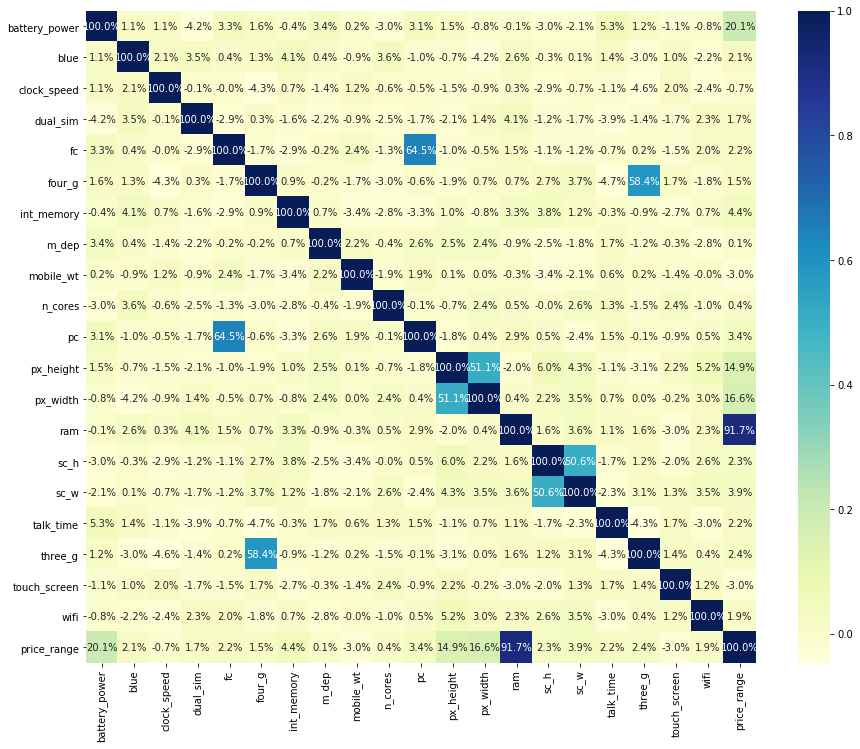

In [18]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df_train.corr(),cmap="YlGnBu",fmt='.1%',annot=True);

In [20]:
df_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [37]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

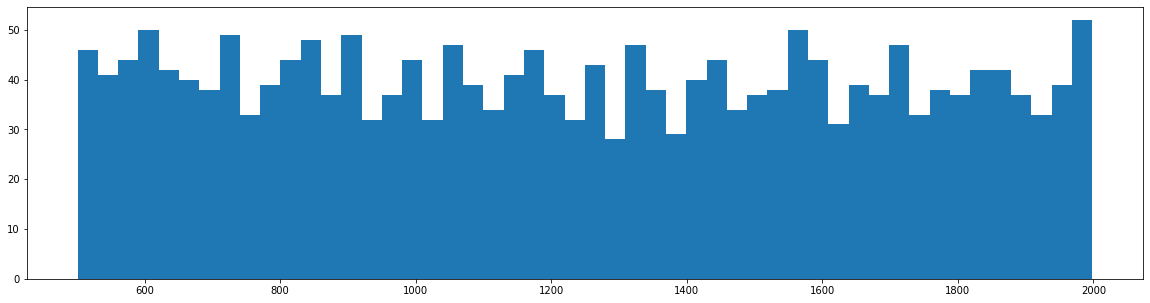

In [38]:
plt.figure(figsize=(20,5))
plt.hist(df_train['battery_power'],bins=50)
plt.show()

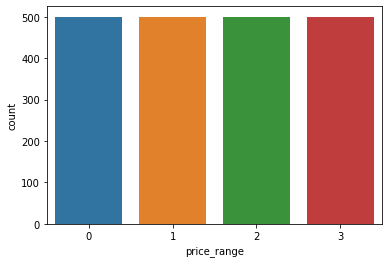

In [39]:
sns.countplot(df_train['price_range'])
plt.show()

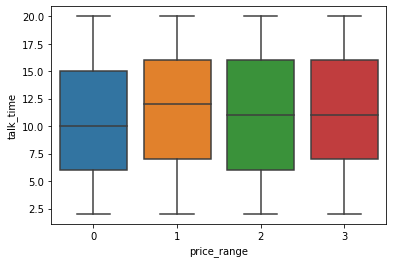

In [41]:
sns.boxplot(df_train['price_range'],df_train['talk_time']);

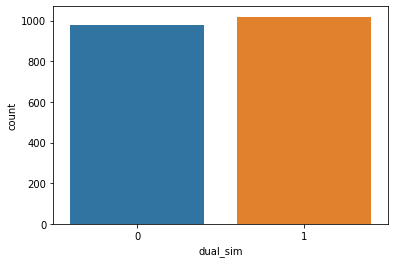

In [43]:
sns.countplot(df_train['dual_sim'])
plt.show()

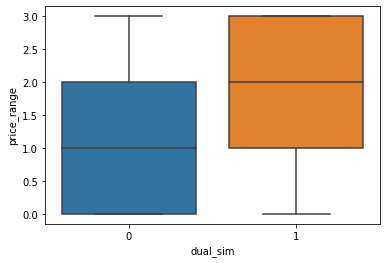

In [44]:
sns.boxplot(df_train['dual_sim'],df_train['price_range'])

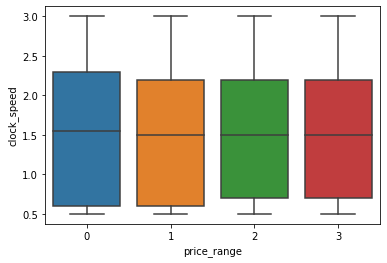

In [45]:
sns.boxplot(df_train['price_range'],df_train['clock_speed'])

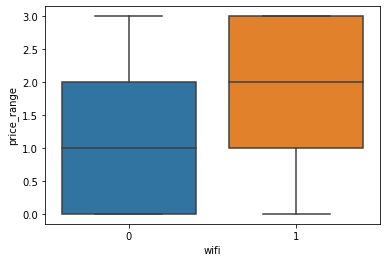

In [46]:
sns.boxplot(df_train['wifi'],df_train['price_range'])
plt.show()

## Phone with 3G support

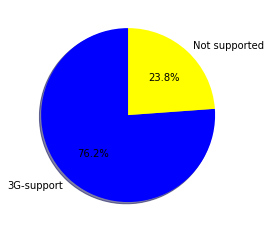

In [54]:
labels = ["3G-support",'Not supported']
values = df_train['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['blue', 'yellow']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

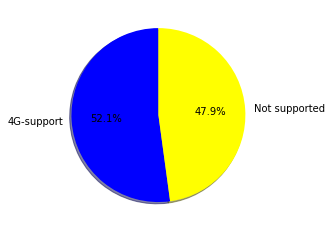

In [58]:
labels = ["4G-support",'Not supported']
values = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['blue', 'yellow']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

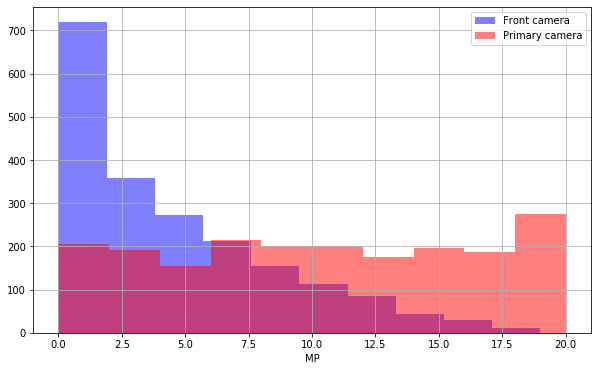

In [60]:
plt.figure(figsize=(10,6))
df_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MP');

# Splitting the dataset into the Training set and Test set

In [64]:
#Applying feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc= sc.fit_transform(x)
test = sc.fit_transform(df_test)

In [65]:
from sklearn.model_selection import train_test_split
x = df_train.drop('price_range',axis=1)
y = df_train['price_range']
x_train,x_test,y_train,y_test = train_test_split(X_sc,y,test_size=0.3)

# Modelling

### 1. Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_reg.score(x_train,y_train)

0.9201988812883174

### 2. Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:98.0
Test Set Accuracy:94.16666666666667

Confusion Matrix:
[[159   6   0   0]
 [  4 130  10   0]
 [  0  10 132   1]
 [  0   0   4 144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       165
           1       0.89      0.90      0.90       144
           2       0.90      0.92      0.91       143
           3       0.99      0.97      0.98       148

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



### 3. KNN_Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
knn.score(x_test,y_test)

print("\nConfusion Matrix:\n%s"%confusion_matrix(pred,y_test))
print("\nClassification Report:\n%s"%classification_report(pred,y_test))


Confusion Matrix:
[[122  43   6   0]
 [ 32  55  44   7]
 [  9  43  70  45]
 [  0   5  26  93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       171
           1       0.38      0.40      0.39       138
           2       0.48      0.42      0.45       167
           3       0.64      0.75      0.69       124

    accuracy                           0.57       600
   macro avg       0.56      0.57      0.56       600
weighted avg       0.57      0.57      0.56       600



### 4. Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(dtree.score(x_test,y_test))

print("\nConfusion Matrix:\n%s"%confusion_matrix(pred,y_test))
print("\nClassification Report:\n%s"%classification_report(pred,y_test))

0.8033333333333333

Confusion Matrix:
[[143  19   0   0]
 [ 20 107  15   0]
 [  0  20 108  21]
 [  0   0  23 124]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       162
           1       0.73      0.75      0.74       142
           2       0.74      0.72      0.73       149
           3       0.86      0.84      0.85       147

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600



### 5. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print(rfc.score(x_test,y_test))

print("\nConfusion Matrix:\n%s"%confusion_matrix(pred,y_test))
print("\nClassification Report:\n%s"%classification_report(pred,y_test))

0.8666666666666667

Confusion Matrix:
[[154  11   0   0]
 [  9 118  20   0]
 [  0  17 111   8]
 [  0   0  15 137]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       165
           1       0.81      0.80      0.81       147
           2       0.76      0.82      0.79       136
           3       0.94      0.90      0.92       152

    accuracy                           0.87       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.87      0.87      0.87       600



### 6.SVM

In [80]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:99.21428571428571
Test Set Accuracy:86.66666666666667

Confusion Matrix:
[[151   9   0   0]
 [ 12 118  19   0]
 [  0  19 117  11]
 [  0   0  10 134]]

ClassificationReport:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       160
           1       0.81      0.79      0.80       149
           2       0.80      0.80      0.80       147
           3       0.92      0.93      0.93       144

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

